# Data Analysis with Python

Notebook with all the projects done in the course

## 1. Mean, Variance, Standard Deviation Calculator

Create a function named calculate() in mean_var_std.py that uses Numpy to output the mean, variance, standard deviation, max, min, and sum of the rows, columns, and elements in a 3 x 3 matrix.

In [3]:
import numpy as np
import pandas as pd

lista = np.random.rand(9)

def calculate(input):

  if len(input)!=9:
      raise ValueError('List must contain nine numbers.')
  else:
      
    input = np.array(input)

    mtx = np.reshape(input,(3,3))

    mean = [np.mean(mtx , axis=0).tolist() , np.mean(mtx , axis=1).tolist() , np.mean(mtx)]
    var = [np.var(mtx, axis = 0).tolist() , np.var(mtx , axis =1).tolist() , np.var(mtx)]
    std_dev = [np.std(mtx , axis = 0).tolist() , np.std(mtx , axis=1).tolist() , np.std(mtx)]
    max_mtx = [np.max(mtx , axis = 0).tolist() , np.max(mtx , axis=1).tolist() , np.max(mtx)]
    min_mtx = [np.min(mtx , axis = 0).tolist() , np.min(mtx , axis=1).tolist() , np.min(mtx)]
    sum_mtx = [np.sum(mtx , axis = 0).tolist() , np.sum(mtx , axis=1).tolist() , np.sum(mtx)]

    calculations = {'mean' : mean,
              'variance' : var,
              'standard deviation' : std_dev,
              'max' : max_mtx,    
              'min' : min_mtx,
              'sum' : sum_mtx }
    
  return calculations
  
print(calculate(lista))

{'mean': [[0.34587132613183513, 0.31828997192763975, 0.4395641626150993], [0.35853845603857787, 0.4023764070102179, 0.3428105976257784], 0.3679084868915247], 'variance': [[0.0026039955414223167, 0.03582827147826115, 0.07685964004509553], [0.02026354241862363, 0.0992313198433356, 0.0019734751067020796], 0.04112469213658358], 'standard deviation': [[0.051029359602314396, 0.18928357424314754, 0.2772357120666375], [0.14235006996353614, 0.3150100313376315, 0.0444238123836989], 0.20279223884701206], 'max': [[0.41418712142428993, 0.49826331957932735, 0.8185791806790879], [0.49826331957932735, 0.8185791806790879, 0.39991216389454953], 0.8185791806790879], 'min': [[0.291571248928692, 0.056694432309042364, 0.1631649271121164], [0.1631649271121164, 0.056694432309042364, 0.291571248928692], 0.056694432309042364], 'sum': [[1.0376139783955054, 0.9548699157829192, 1.318692487845298], [1.0756153681157337, 1.2071292210306537, 1.0284317928773352], 3.3111763820237226]}


## 2. Demographic Data Analyzer

In this challenge you must analyze demographic data using Pandas. You are given a dataset of demographic data that was extracted from the 1994 Census database.

In [25]:
# Read data from file
df = pd.read_csv('https://raw.githubusercontent.com/nahue-passano/data_analysis_freeCodeCamp/main/database/adult.data.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [26]:
# How many of each race are represented in this dataset? This should be a Pandas series with race names as the index labels.
race_count = df['race'].value_counts()
print('Race count: \n'  + str(race_count))

# What is the average age of men?
average_age_men = round(df.loc[ df['sex'] == 'Male' ]['age'].mean() ,1)
print('Average age of men: ' + str(average_age_men))

# What is the percentage of people who have a Bachelor's degree?
percentage_bachelors = round(df['education'].value_counts().loc['Bachelors'] / df.shape[0] * 100 ,1)
print('Percentage of people who have a Bachelors degree: ' + str(percentage_bachelors) )

# What percentage of people with advanced education (`Bachelors`, `Masters`, or `Doctorate`) make more than 50K?
# What percentage of people without advanced education make more than 50K?

# with and without `Bachelors`, `Masters`, or `Doctorate`
adv_ed_df = df[(df['education'] ==  'Masters') | (df['education'] ==  'Bachelors') | (df['education'] ==  'Doctorate')]
low_ed_df = df[~((df['education'] ==  'Masters') | (df['education'] ==  'Bachelors') | (df['education'] ==  'Doctorate'))]

# percentage with salary >50K
higher_education_rich = round(adv_ed_df[adv_ed_df['salary']=='>50K'].count()[0] / adv_ed_df.count()[0] * 100 ,1)
lower_education_rich = round(low_ed_df[low_ed_df['salary']=='>50K'].count()[0] / low_ed_df.count()[0] * 100 ,1)

print('Percentage of people with advanced education that make more than 50K: ' + str(higher_education_rich))
print('Percentage of people without advanced education that make more than 50K: ' + str(lower_education_rich))

# What is the minimum number of hours a person works per week (hours-per-week feature)?
min_work_hours = df['hours-per-week'].min()
print('Minimum number of hours a person works per week: ' + str(min_work_hours))

# What percentage of the people who work the minimum number of hours per week have a salary of >50K?
num_min_workers = round(df[df['hours-per-week'] == min_work_hours] , 1)

rich_percentage = round(num_min_workers[num_min_workers['salary'] == '>50K'].count()[0] / num_min_workers.count()[0] * 100 ,1)

# What country has the highest percentage of people that earn >50K?
rich_per_country = df[df['salary'] == '>50K']['native-country'].value_counts()
count_per_country = df['native-country'].value_counts()
perc_per_country = rich_per_country / count_per_country * 100

highest_earning_country = perc_per_country.idxmax()
highest_earning_country_percentage = round(perc_per_country.max() ,1)

print('Country with the highest percentage of people that earn more than 50K: ' + highest_earning_country)

# Identify the most popular occupation for those who earn >50K in India.
rich_indians = df[(df['native-country'] == 'India') & (df['salary'] == '>50K')]
top_IN_occupation = rich_indians['occupation'].value_counts().idxmax()

print('Most popular occupation for those who earn more than 50K in India: ' + top_IN_occupation)


Race count: 
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64
Average age of men: 39.4
Percentage of people who have a Bachelors degree: 16.4
Percentage of people with advanced education that make more than 50K: 46.5
Percentage of people without advanced education that make more than 50K: 17.4
Minimum number of hours a person works per week: 1
Country with the highest percentage of people that earn more than 50K: Iran
Most popular occupation for those who earn more than 50K in India: Prof-specialty


## 3. Medical Data Visualizer

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.



In [27]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/nahue-passano/data_analysis_freeCodeCamp/main/database/medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


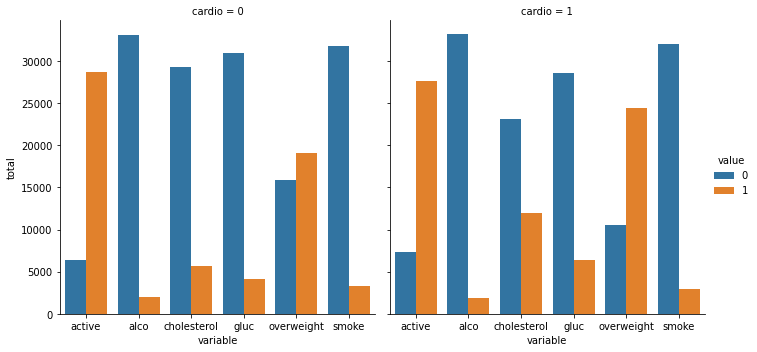

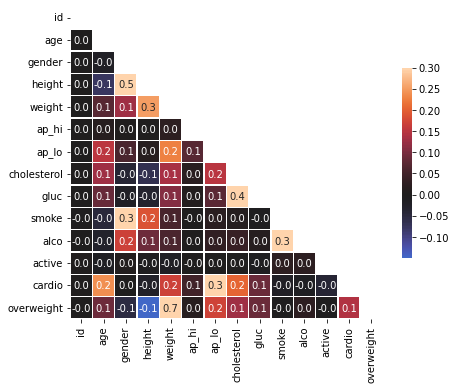

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add 'overweight' column
df['overweight'] = np.array(df['weight'] / (df['height']/100)**2 > 25 , dtype=int )

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
         (df['height'] >= df['height'].quantile(0.025)) &
         (df['height'] <= df['height'].quantile(0.975)) &
         (df['weight'] >= df['weight'].quantile(0.025)) &
         (df['weight'] <= df['weight'].quantile(0.975)) ]

def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars = 'cardio', var_name = 'variable', value_vars = ['alco', 'active','cholesterol', 'gluc', 'overweight','smoke'])

    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
    df_cat = pd.melt(df, var_name = 'variable', value_vars = ['active','alco','cholesterol', 'gluc','overweight','smoke'], id_vars = 'cardio')

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(data=df_cat, kind="count",  x="variable",hue="value", col="cardio").set_axis_labels("variable", "total")
    fig = fig.fig

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo']<=df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025))&
    (df['height'] <= df['height'].quantile(0.975))&
    (df['weight'] >= df['weight'].quantile(0.025))&
    (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()
    
    # Generate a mask for the upper triangle
    mask = np.triu(corr)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(7, 7))
    
    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(data = corr,
                mask=mask,
                fmt='.1f',
                vmax=.3,
                linewidths=.5,
                square=True,
                cbar_kws = {'shrink':0.5},
                annot=True, 
                center=0)
    
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    #return fig

draw_cat_plot()
draw_heat_map()

## 4. Page View Time Series Visualizer

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [29]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('https://raw.githubusercontent.com/nahue-passano/data_analysis_freeCodeCamp/main/database/fcc-forum-pageviews.csv',
                 sep = ',', index_col = 'date', parse_dates = ['date'])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


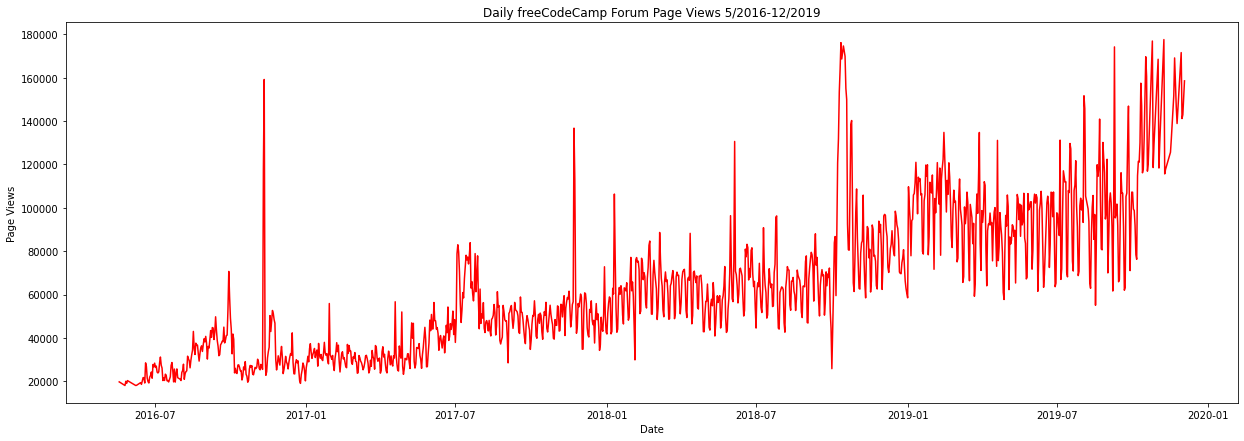

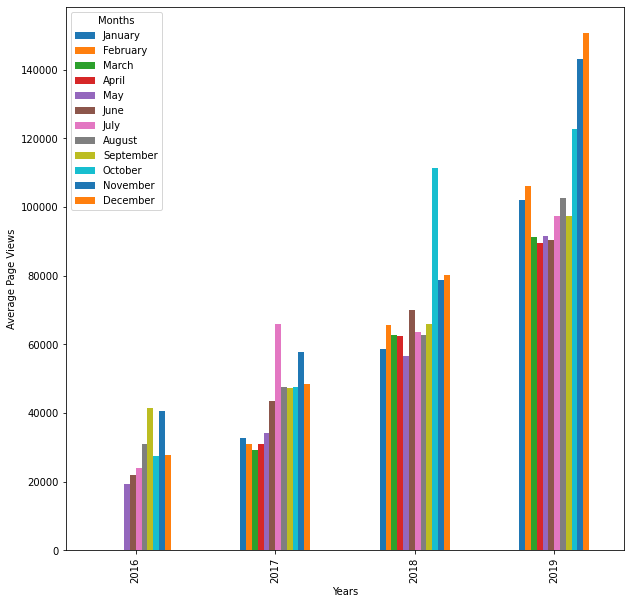

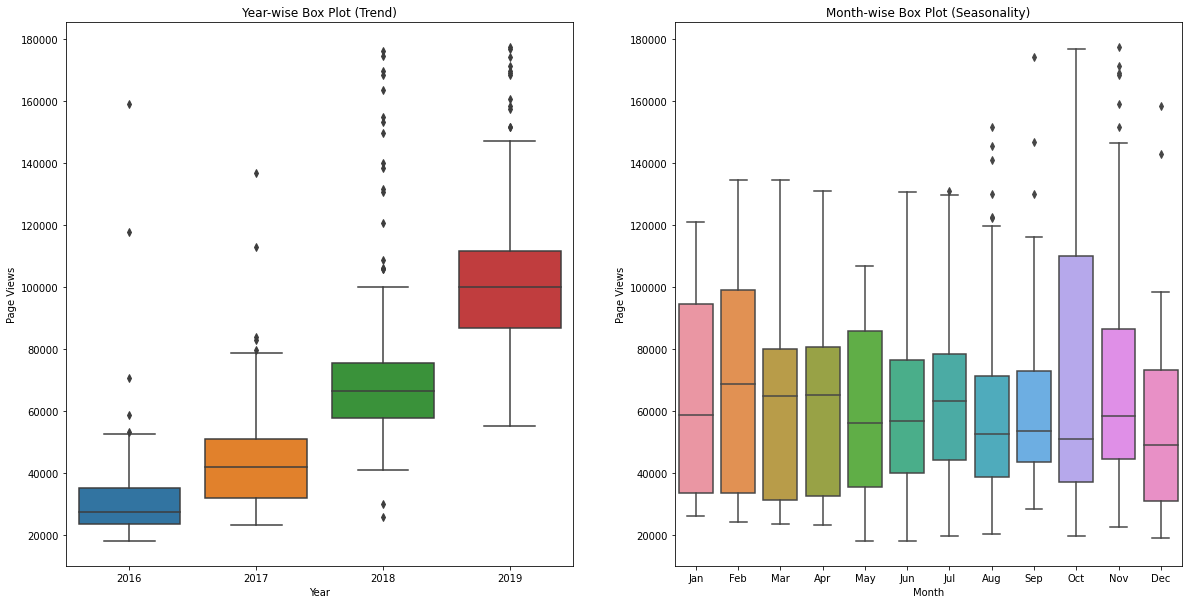

In [21]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Clean data
df = df[(df['value'] <= df['value'].quantile(0.975)) &
        (df['value'] >= df['value'].quantile(0.025))]

def draw_line_plot():
    # Draw line plot
    fig , ax = plt.subplots(figsize = (21,7))
    ax.plot(df.index , df['value'] , color = 'red')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    #return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df['month'] = df.index.month
    df['year'] = df.index.year
    df_bar = df.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()

    # Draw bar plot
    fig , ax = plt.subplots(figsize = (10,10)) 
    df_bar.plot(kind = 'bar',
                xlabel = 'Years',
                ylabel = 'Average Page Views',
                ax = ax)

    plt.legend(title = 'Months', labels = ['January', 'February', 'March',
                                           'April', 'May', 'June', 
                                           'July', 'August', 'September', 
                                           'October','November', 'December'] )

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    #return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig , (ax1, ax2) = plt.subplots(1,2,figsize = (20,10))
    ax1 = sns.boxplot(x = df_box['year'],
                      y = df_box['value'],
                      ax = ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    
    ax2 = sns.boxplot(x = df_box['month'],
                      y = df_box['value'],
                      ax = ax2,
                      order = ['Jan', 'Feb', 'Mar',
                               'Apr', 'May', 'Jun',
                               'Jul', 'Aug', 'Sep',
                               'Oct', 'Nov', 'Dec'])
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    #return fig

draw_line_plot()
draw_bar_plot()
draw_box_plot()

## 5. Sea Level Predictor

You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.

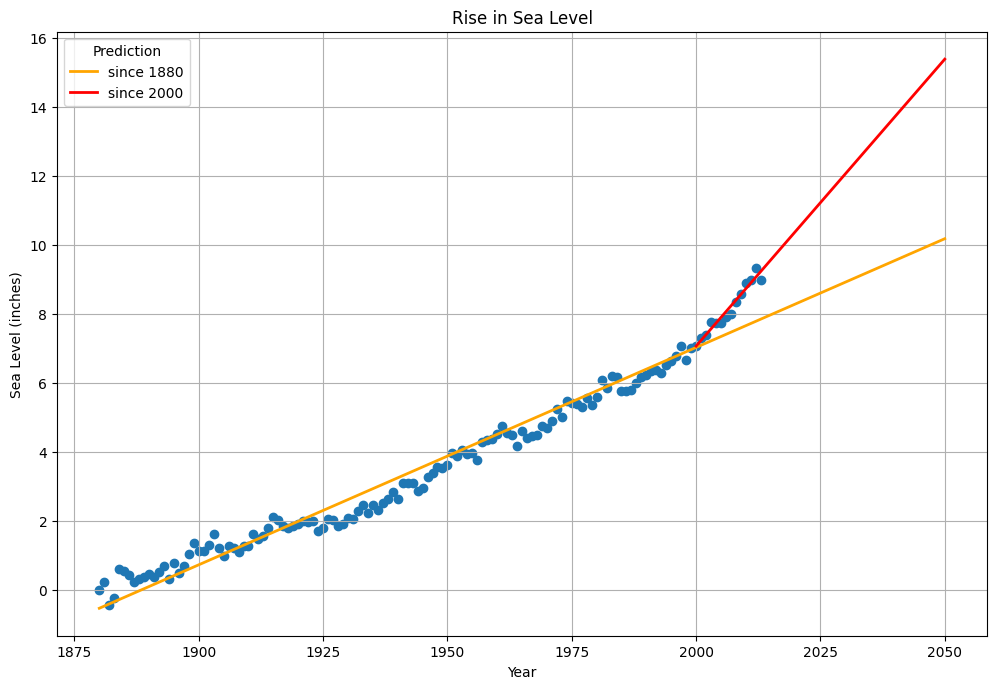

In [24]:
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df = pd.read_csv('https://raw.githubusercontent.com/nahue-passano/data_analysis_freeCodeCamp/main/database/epa-sea-level.csv')

    # Create scatter plot
    fig, ax = plt.subplots(figsize = (12,8),dpi=100)
    plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'] )

    # Create first line of best fit
    a_1 , b_1 , r_1 , p_1, std_1 = linregress( df['Year'] , df['CSIRO Adjusted Sea Level'])
    x_1 = np.arange(df['Year'].min(),2051)
    y_1 = a_1*x_1 + b_1
    plt.plot(x_1 , y_1, linewidth = 2 , color = 'orange', label = 'since {year}'.format(year = df['Year'].min()))

    # Create second line of best fit
    df_2000 = df[df['Year'] >= 2000]
    a_2 , b_2 , r_2 , p_2, std_2 = linregress( df_2000['Year'] , df_2000['CSIRO Adjusted Sea Level'])
    x_2 = np.arange(2000,2051)
    y_2 = a_2*x_2 + b_2
    plt.plot(x_2 , y_2, linewidth = 2 , color = 'red', label = 'since 2000')
    
    # Add labels and title
    ax.set_title('Rise in Sea Level')
    ax.set_xlabel('Year')
    ax.set_ylabel('Sea Level (inches)')
    plt.legend(title = 'Prediction', )
    plt.grid()
    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig('sea_level_plot.png')
    return plt.gca()

draw_plot()